## Linear Regression

In [1]:
import pandas as pd
import numpy as np
from math import sqrt

import matplotlib

### Data

In [2]:
df = pd.DataFrame(columns=['x', 'y', 'x2', 'y2', 'xy'])

In [3]:
## DATAFRME
df['x'] = [1.24,1.35,1.11,1.84,2.03,2.12,1.98,1.65,1,1.5,1.79,1.56]
df['y'] = [63.96,66.33,62.91,78.57,80.49,81.72,78.88, 73.77,58.68,68.32,75.16,68.5]
df['x2'] = df['x']**2
df['y2'] = df['y']**2
df['xy'] = df['x']*df['y']
df = df.round(2)

In [4]:
df

,x,y,x2,y2,xy
0,1.24,63.96,1.54,4090.88,79.31
1,1.35,66.33,1.82,4399.67,89.55
2,1.11,62.91,1.23,3957.67,69.83
3,1.84,78.57,3.39,6173.24,144.57
4,2.03,80.49,4.12,6478.64,163.39
5,2.12,81.72,4.49,6678.16,173.25
6,1.98,78.88,3.92,6222.05,156.18
7,1.65,73.77,2.72,5442.01,121.72
8,1.00,58.68,1.00,3443.34,58.68
9,1.50,68.32,2.25,4667.62,102.48


<AxesSubplot:xlabel='x', ylabel='y'>

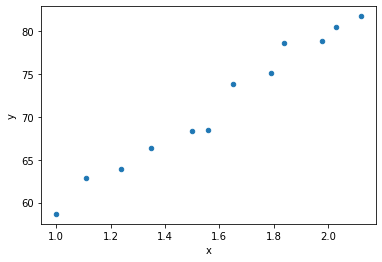

In [5]:
df.plot(x="x", y="y", kind='scatter')

### Statistics 

In [6]:
n = len(df)
print("n:",n)

n: 12


In [7]:
addn = df.sum().round(4).to_dict()
print("Summations",addn)

Summations {'x': 19.17, 'y': 857.29, 'x2': 32.11, 'y2': 61894.56, 'xy': 1400.36}


In [8]:
avg = df.mean().round(4).to_dict()
print("avg",avg)

avg {'x': 1.5975, 'y': 71.4408, 'x2': 2.6758, 'y2': 5157.88, 'xy': 116.6967}


<br>

### Correlation coefficient, $S_{xx}, S_{yy}, S_{xy}$

**r = $\frac{S_(xy)}{\sqrt{S_(xx) S_(yy)}}$**

WHERE <br>

* **$S_(xy) =  \sum_{i=1}^{n} (x_i - \bar x)(y_i - \bar y) \ \ = \sum xy \ - \ \frac{\sum x \sum y}{n} $**
* **$S_(xx) =  \sum_{i=1}^{n} (x_i - \bar x)^2 \ \ = \ (\sum x^2) \  - \frac{(\sum x)^2}{n}$**
* **$S_(yy) =  \sum_{i=1}^{n} (y_i - \bar y)^2 \ \ = \ (\sum y^2) \  - \frac{(\sum y)^2}{n}$**


**r = $\Large \frac{\sum xy \ - \ \frac{\sum x \sum y}{n} }{\sqrt {[(\sum x^2) \  - \frac{(\sum x)^2}{n}][(\sum y^2) \  - \frac{(\sum y)^2}{n}]}}$**

In [9]:
# Numerator
S_xy = addn['xy'] - (((addn['x']*addn['y']) / n))
num_r = S_xy 
# denominator
S_xx = (addn['x2'] - (pow(addn['x'],2) / n)) 
S_yy = (addn['y2'] - (pow(addn['y'],2) / n))
den_r = sqrt(S_xx*S_yy)

# correlation coefficient
r = round((num_r/den_r),4)
print("Sxy:{} Sxx:{} Syy:{} ".format(S_xy,S_xx,S_yy))
print("r:",r)

Sxy:30.839224999999942 Sxx:1.4859249999999946 Syy:649.0479916666736 
r: 0.993


## Linear Regression a, b

**$\large \hat y = a + bx$** <br>

FOR BEST FIT LINE : <br>

**$\large  b = \frac{S_(xy)}{S_(xx)} \ = \ \frac{\sum (x\ - \ \bar x)(y\ - \ \bar y)}{\sum (x - \bar x)^2} = \ \ \frac{\sum xy \ - \ \frac{\sum x \sum y}{n} }{(\sum x^2) \  - \frac{(\sum x)^2}{n}}  \ \ AND $**

**$\large \bar y \ = \ a\ + b\bar x $**

In [10]:
# Numerator
num_r = addn['xy'] - (((addn['x']*addn['y']) / n))
# denominator
den_r = (addn['x2'] - (pow(addn['x'],2) / n))

# b
b = round((num_r/den_r),3)

# a
a = round((avg['y']-(b*avg['x'])),4)

print('xBar:{} yBar:{}'.format(avg['x'],avg['y']))
print('a:{} b:{}'.format(a,b))

xBar:1.5975 yBar:71.4408
a:38.2863 b:20.754


## Assessing fit line

### Residuals $SS_{Tot}, SS_{Resid}, SS_{Reg}$

$Total\ Variation = Explained\ variation \ +\ Unexplained\ variation$ <br> 

THAT IS : <br>
$SS_{tot} = SS_{Reg} + SS_{Resid}$ <br>

ALGEBRICALLY: <br>
$\sum (y\ - \ \bar y)^2 = \sum (\hat y\ - \ \bar y)^2 \ + \ \sum (y \ - \hat y)^2 $ <br>

THUS <br>
$SS_{Tot} = \sum y^2 - \frac{(\sum y)^2}{n}$ <br>
$SS_{Resid} = \sum y^2 -\ a\sum y -\ b\sum xy$ <br>
$SS_{Reg} =\  SS_{tot} - SS_{Resid}$ <br>

In [11]:
# total variation
SS_tot = round((addn['y2'] - (pow(addn['y'],2)/n)),4)
# Explained variation
SS_resid = round((addn['y2'] - (a*addn['y']) - (b*addn['xy'])),4)
# unexplained variation
SS_reg = round((SS_tot - SS_resid),2)

print("SS_tot:{} SS_resid:{} SS_reg:{}".format(SS_tot,SS_resid,SS_reg))

SS_tot:649.048 SS_resid:9.0264 SS_reg:640.02


### Coefficient of Determination : r2
$\large r^2 = \frac{SS_{Reg}}{SS_{Tot}} \ = 1 -\ \frac{SS_{Resid}}{SS_{Tot}}$ <br>

In [12]:
# coefficient of determination
r2 = round((SS_reg / SS_tot),4)

print("r2: ",r2)

r2:  0.9861


### Standard deviation about Least Squares (LS) Line : $S_e, S_b$

**$S_e = \sqrt{\frac{\sum (y - \hat y)^2}{n-2}} = \ \sqrt{\frac{SS_{resid}}{n-2}}$** <br>
**$S_b = \sqrt{\frac{(S_e)^2}{S_{xx}}} = \ \sqrt{\frac{SS_{resid}}{n-2}}$**

#### BEWARE : df = n-2 

In [13]:
# standard deviation about LS line
Se2 = round(SS_resid / (n-2),4)
Se = round(sqrt(Se2),4)
Sb = round(sqrt(Se2 / S_xx),4)
print("Se2: ",Se2)
print("Se: ",Se)
print("Sb: ",Sb)

Se2:  0.9026
Se:  0.9501
Sb:  0.7794


### Confidence interval for $\beta $


#### from percent interval (eg. p = 95%), find P value for $\frac{\alpha}{2} * 100 = \frac{1- (95/100)}{2} * 100 = 2.5$, and look up area in  $t_c$ [df = n-2] in % tables

$CI = b\ \pm \ (t_c)S_b$

* Calcuate $Sb$ using :
    * $S_e$ which needs $SS_{resid}$
    * $S_{xx}$

In [14]:
def find_P(percentage):
    return round((((1 - (percentage / 100))/ 2) * 100),4)

print("P::: ", find_P(90))

P:::  5.0


#### Enter Tc

In [15]:
tc = 1.943

In [16]:
def CI(b, tc, Sb):
    return round((tc*Sb),4), round((b-(tc*Sb)), 4), round((b+(tc*Sb)), 4)

"""CI(b, tc, Sb)"""
print("b:{} +- term:: {} pmean range:::{} --> {} ".format(b, *CI(b, tc, Sb)))

b:20.754 +- term:: 1.5144 pmean range:::19.2396 --> 22.2684 


## Interpretation of $\hat y$

$StandardError = \ S_{a+bx^*} = S_e \sqrt{\frac{1}{n}\ + \frac{(x^* - \bar x)^2}{S_{xx}}}$

$PredictionInterval_{a+bx^*} = a+bx^* \pm t_c \sqrt{(S_e)^2\ + (S_{a+bx^*})^2}$

In [17]:
x_in = 17.5
xBar = avg['x']

#Standard error
S_a_bx = round((Se * sqrt((1/n) +(pow((x_in - xBar),2)/(S_xx)))),4)
S_a_bx2 = round(pow(S_a_bx,2),2)
#Prediction interval
a_bx = a + b*(x_in)
pmterm = tc*sqrt(Se2 + S_a_bx2)
interval = [a_bx-pmterm, a_bx+pmterm] 
print("StandardError",S_a_bx)
print("a+bx*:{} +- term:: {} pmean range:::{} ".format(a_bx,pmterm,interval))

StandardError 12.3977
a+bx*:401.48130000000003 +- term:: 24.15912479887051 pmean range:::[377.32217520112954, 425.6404247988705] 


## Model Utility Test (Specific Test: H0 : $\beta $ = 0)
* **Calculate t -->  $\ \ \ t = \frac{b}{S_b}$**
* **from t-table, find p-value of area under curve : p = 2(< Area t)**
* Reject $H_o$ $ :  \ \ p \lt \alpha$

In [18]:
t = round((b/Sb),4)
print("t: ",t)

t:  26.6282
